KAUSTUBH RAYKAR 
1. regression 

In [138]:
import pandas as pd
df=pd.read_csv('/content/train_v9rqX0R.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [139]:
df.shape 

(8523, 12)

In [157]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [140]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [141]:
#missing values in IteM weight and Outlet size needs to be imputed 
mean = df['Item_Weight'].mean() #inputing iteM weight with mean 
df['Item_Weight'].fillna(mean, inplace=True)

mode= df['Outlet_Size'].mode() #inputing outlet size with mode 
df['Outlet_Size'].fillna(mode[0], inplace=True)

In [142]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [143]:
df.drop(['Item_Identifier','Outlet_Identifier','Outlet_Size'], axis=1, inplace=True)

In [144]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Tier 3,Supermarket Type2,1845.5976


Applying encoding 

In [145]:
unique_fat_content = df['Item_Fat_Content'].unique()
print(unique_fat_content)

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [146]:
unique_item_types = df['Item_Type'].unique()
print(unique_item_types)

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


In [147]:
unique_Outlet_Location_Type = df['Outlet_Location_Type'].unique()
print(unique_Outlet_Location_Type)

['Tier 1' 'Tier 3' 'Tier 2']


In [148]:
unique_Outlet_Type = df['Outlet_Type'].unique()
print(unique_Outlet_Type)

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [149]:
# create a dictionary to map unique values to labels for 'Item_Fat_Content' column
fat_content_labels = {'Low Fat': 0, 'Regular': 1, 'low fat': 2, 'LF': 3, 'reg': 4}

# apply label encoding to 'Item_Fat_Content' column using the mapping
df['Item_Fat_Content'] = df['Item_Fat_Content'].map(fat_content_labels)

# create a dictionary to map unique values to labels for 'Item_Type' column
item_type_labels = {'Dairy': 0, 'Soft Drinks': 1, 'Meat': 2, 'Fruits and Vegetables': 3, 'Household': 4,
                    'Baking Goods': 5, 'Snack Foods': 6, 'Frozen Foods': 7, 'Breakfast': 8,
                    'Health and Hygiene': 9, 'Hard Drinks': 10, 'Canned': 11, 'Breads': 12, 'Starchy Foods': 13,
                    'Others': 14, 'Seafood': 15}

# apply label encoding to 'Item_Type' column using the mapping
df['Item_Type'] = df['Item_Type'].map(item_type_labels)

# create a dictionary to map unique values to labels for 'Outlet_Location_Type' column
location_labels = {'Tier 1': 0, 'Tier 2': 1, 'Tier 3': 2}

# apply label encoding to 'Outlet_Location_Type' column using the mapping
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].map(location_labels)

# create a dictionary to map unique values to labels for 'Outlet_Type' column
outlet_type_labels = {'Supermarket Type1': 0, 'Supermarket Type2': 1, 'Grocery Store': 2, 'Supermarket Type3': 3}

# apply label encoding to 'Outlet_Type' column using the mapping
df['Outlet_Type'] = df['Outlet_Type'].map(outlet_type_labels)


In [150]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,0,249.8092,1999,0,0,3735.1380
1,5.920,1,0.019278,1,48.2692,2009,2,1,443.4228
2,17.500,0,0.016760,2,141.6180,1999,0,0,2097.2700
3,19.200,1,0.000000,3,182.0950,1998,2,2,732.3800
4,8.930,0,0.000000,4,53.8614,1987,2,0,994.7052
...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,6,214.5218,1987,2,0,2778.3834
8519,8.380,1,0.046982,5,108.1570,2002,1,0,549.2850
8520,10.600,0,0.035186,9,85.1224,2004,1,0,1193.1136
8521,7.210,1,0.145221,6,103.1332,2009,2,1,1845.5976


train test

In [151]:
from sklearn.model_selection import train_test_split 
train, test=train_test_split(df, test_size = 0.3)

x_train= train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test= test.drop('Item_Outlet_Sales', axis=1)
y_test = test['Item_Outlet_Sales']

In [152]:
print("Shape of train:", train.shape)
print("Shape of test:", test.shape)
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of train: (5966, 9)
Shape of test: (2557, 9)
Shape of x_train: (5966, 8)
Shape of y_train: (5966,)
Shape of x_test: (2557, 8)
Shape of y_test: (2557,)


In [165]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler (feature_range=(0, 1))

x_train_scaled= scaler.fit_transform(x_train)
x_train= pd.DataFrame(x_train_scaled)

x_test_scaled=scaler.fit_transform(x_test)
x_test= pd.DataFrame(x_test_scaled)

In [166]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_val = [] #to store rmse values for diff k
k_list= []
for k in range(50):
    k = k+1
    model= KNeighborsRegressor(n_neighbors= k)
    
    model.fit(x_train, y_train) #fit the model
    pred= model.predict(x_test) #make prediction on test set
    error= sqrt(mean_squared_error(y_test,pred)) #calc rmse
    rmse_val.append(error) #store rmse values
    k_list.append(k)


In [167]:
best_rmse=min(rmse_val)
best_k=k_list[rmse_val.index(best_rmse)]
print('Optimum K val= ',best_k, ' with least RMSE= ',best_rmse)

Optimum K val=  29  with least RMSE=  1080.1444631191746


<AxesSubplot:>

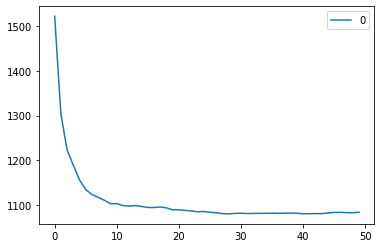

In [168]:
curve = pd.DataFrame(rmse_val)
curve.plot()